In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def get_coordinates(g1, g2, n):
    '''
    Breif: Extracts the coordinates of matching genes
           from the given gene expressions.
    Arguments:
        g1 = List of gene 1 bases.
        g2 = List of gene 2 bases.
        n = Length of the gene expression.
    Returns:
        (x, y) = Tuple of lists of x and y coordinates 
                 corresponding to the matching gene.
    '''
    x = []
    y = []
    
    for i in range(n):
        for j in range(n):
            #If the gene matches
            if g1[i] == g2[j]:
                #Extract the coordinates of the dot.
                y.append(j + 1)
                x.append(i + 1)   
    return (x, y)

In [3]:
def plot_result(x, y, g1, g2, n, title):
    '''
    Brief: Plots the dots on a Cartesian plane.
    Arguments:
        x = List of x-coordinates.
        y = List of y-coordinates.
        g1 = List of gene 1 bases.
        g2 = List of gene 2 bases.
        n = Length of the gene expression.
        title = String for the label of the plot.
    Returns:
        plt = The plot object.
    '''
    
    #Set the max and min limits for x and y axes:
    xmin, xmax, ymin, ymax = 0, n, 0, n
    
    #Get the canvas:
    fig = plt.figure(figsize = (10, 10))
    ax = fig.add_axes([0, 0, 0.8, 0.8]) # main axes
    
    #Set identical scales for both axes:
    ax.set(xlim = (xmin - 1, xmax + 1), ylim = (ymin - 1, ymax + 1), aspect = 'equal')
    
    #Add the dots:
    ax.scatter(x, y, c = ['m'], s = 80)
    
    #Set bottom and left spines as x and y axes:
    ax.spines['bottom'].set_position(('axes', 1))
    ax.spines['left'].set_position('zero')

    #Remove top and right spines:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    #Create 'x' and 'y' labels placed at the appropriate positions:
    ax.set_xlabel('Gene 1', size=14, x = 1.08)
    ax.set_ylabel('Gene 2', size=14, y = 1, rotation=0)
    
    #Set the x-axis on top:
    ax.xaxis.tick_top()

    #Create custom major ticks to determine position of tick labels:
    x_ticks = np.arange(xmin, xmax + 1, 1)
    y_ticks = np.arange(ymin, ymax + 1, 1)
    ax.set_xticks(x_ticks[x_ticks != 0])
    ax.set_yticks(y_ticks[y_ticks != 0])
    
    #Set the tick labels:
    ax.set_xticklabels(g1)
    ax.set_yticklabels(g2)

    #Draw major and minor grid lines:
    ax.grid(which = 'both', color = 'grey', linewidth = 0.5, linestyle = '-', alpha = 0.2)
    
    #Add the title:
    ax.set_title(title, fontdict={'fontsize': 22, 'fontweight': 'medium'})
    
    #return the final plot:
    return plt

In [12]:
def clean_coordinates(x, y, threshold): 
    '''
    Brief: From the list of all the coordinates extracts
           the one which satisfies the threshold condition.
    Arguments:
        x = List of x-coordinates.
        y = List of y-coordinates.
        threshold = The threshold value.
    Returns:
        clean = A 2-D list of filtered x and y coordinates.
        
    '''
    
    #Make a 2-D list of all the coordinates:
    coordinates = list(zip(x, y))
    coordinates = [list(item) for item in coordinates]
    
    curr = list() #Holds the value of the current coordinates.
    temp = list() #Holds the list of valid neighbours for the 
                  #current coordinate.
    clean = list() #Final list of all the cleaned coordinates.
    
    for coordinate in coordinates:
        
        #Not to consider any coordinate which is already present
        #in clean:
        if coordinate in clean:
            continue
        
        curr = coordinate
        print(f"\t\t\tCURR = {curr}")
        
        #Initialize count:
        count = 0
        
        while count < threshold:
            
            #Get the neighbour coordinates:
            neighbour = [curr[0] + 1, curr[1] - 1]
            print(f"Neighbour = {neighbour}")
            
            if neighbour in coordinates:
                print("Neighbour found!")
                #curr is now a valid coordinate.
                count += 1
                print(f"Count = {count}")
                temp.append(curr)
                print(f"Temp = {temp}")
                curr =  neighbour #Make curr its neighbour.
            
            #If the coordinate is the last neighbour of coordinate 
            #but doesn't have any further neighbours.
            elif count == threshold - 1:
                print("Last neighbour encountered...")
                temp.append(curr)
                break
            
            else:
                print("Neighbour not found")
                temp.clear() #Flush temp.
                print(f"Temp = {temp}")
                count = 0 #Reset count to 0.
                break
        else:
            #If coordinate has more than 5 neighbours:
            while True:
                #Get the neighbour:
                print("Threshold crossed.")
                temp.append(curr)
                neighbour = [curr[0] + 1, curr[1] - 1]
                #No further neighbours found:
                if neighbour not in coordinates:
                    break
                print(f"Temp = {temp}")
                curr =  neighbour
                
        #Build clean for each coordinate and its temporary 
        #list of neighbours:
        for coord in temp:
            if coord not in clean:
                clean.append(coord)
        temp.clear()
        print(f"Clean : {clean}")
            
    return clean

In [5]:
def get_clean_xy(clean_coord):
    '''
    Brief: From a 2-D list of clean coordinates get x and y
           separated.
    Arguments:
        clean_coord = A 2-D list of all the clean coordinates.
    Returns:
        (x, y) = Tuple of lists of x and y coordinates.
    '''
    x= []
    y = []
    for coord in clean_coord:
        x.append(coord[0])
        y.append(coord[1])
    return (x, y)

# Driver Code:

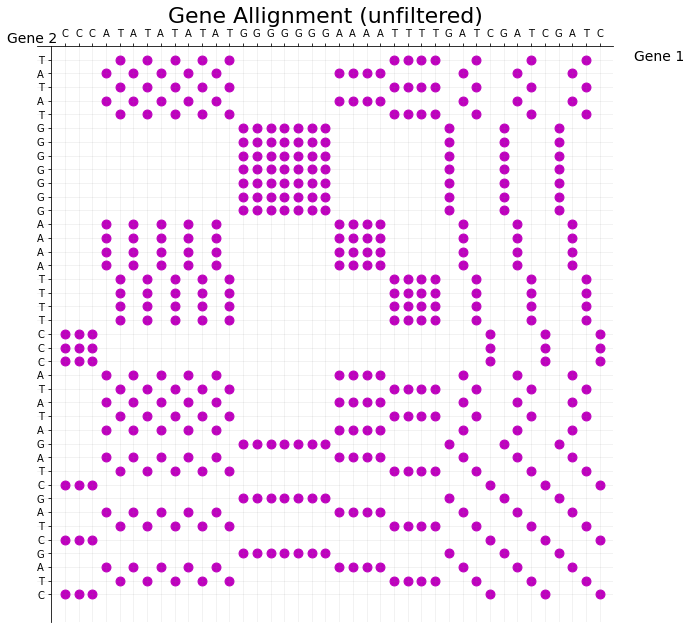

In [9]:
n = int(input("Enter the length of your genes: ")) #40
gene_1 = input("Enter gene sequence 1: ") #"CCCATATATATATGGGGGGGAAAATTTTGATCGATCGATC"
gene_2 = input("Enter gene sequence 2: ") #"TATATGGGGGGGAAAATTTTCCCATATAGATCGATCGATC"
threshold = int(input("Enter the threshold for cleaning: ")) #10

g1 = [base for base in gene_1]
g2 = [base for base in gene_2]

g = [base for base in gene_2]
if g2 == g:
    g2.reverse()

x, y = get_coordinates(g1, g2, n)
result = plot_result(x, y, g1, g2, n, "Gene Allignment (unfiltered)") 

result.show()

In [10]:
clean_coord = clean_coordinates(x,y, threshold)

			CURR = [1, 1]
Neighbour = [2, 0]
Neighbour not found
Temp = []
Clean : []
			CURR = [1, 5]
Neighbour = [2, 4]
Neighbour not found
Temp = []
Clean : []
			CURR = [1, 9]
Neighbour = [2, 8]
Neighbour not found
Temp = []
Clean : []
			CURR = [1, 18]
Neighbour = [2, 17]
Neighbour not found
Temp = []
Clean : []
			CURR = [1, 19]
Neighbour = [2, 18]
Neighbour found!
Count = 1
Temp = [[1, 19]]
Neighbour = [3, 17]
Neighbour not found
Temp = []
Clean : []
			CURR = [1, 20]
Neighbour = [2, 19]
Neighbour found!
Count = 1
Temp = [[1, 20]]
Neighbour = [3, 18]
Neighbour found!
Count = 2
Temp = [[1, 20], [2, 19]]
Neighbour = [4, 17]
Neighbour found!
Count = 3
Temp = [[1, 20], [2, 19], [3, 18]]
Neighbour = [5, 16]
Neighbour found!
Count = 4
Temp = [[1, 20], [2, 19], [3, 18], [4, 17]]
		CURR = [5, 16]
Threshold crossed.
Temp = [[1, 20], [2, 19], [3, 18], [4, 17], [5, 16]]
		CURR = [6, 15]
Threshold crossed.
Temp = [[1, 20], [2, 19], [3, 18], [4, 17], [5, 16], [6, 15]]
		CURR = [7, 14]
Threshold cross

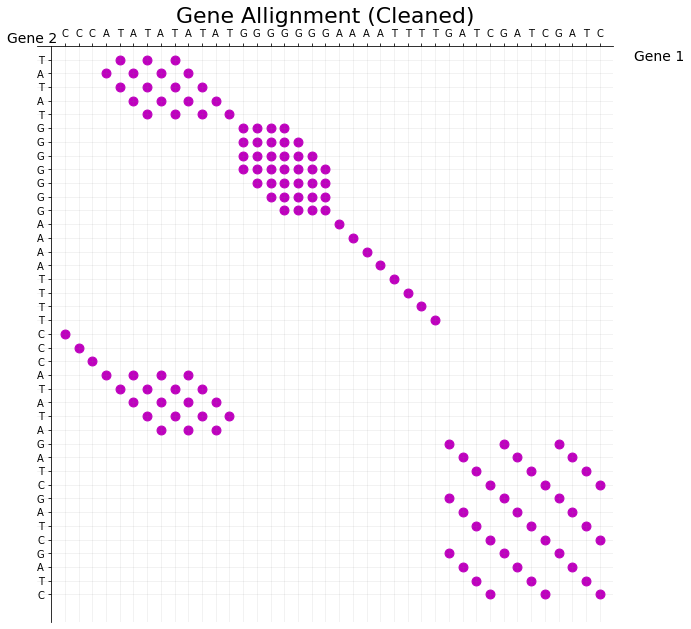

In [11]:
clean_x, clean_y = get_clean_xy(clean_coord)
clean_result = plot_result(clean_x, clean_y, g1, g2, n, "Gene Allignment (Cleaned)")
clean_result.show()